In [1]:
import pandas as pd
import numpy as np
import re
import commons as cmns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Audio
sound_file = 'beep.wav'

In [2]:
data=pd.read_csv('all_BTC_Data.csv',sep=',')

In [3]:
data.shape

(2436, 738)

In [4]:

hashrate_cols = [col for col in data.columns if 'hashrate' in col]
data.drop(columns=hashrate_cols, inplace=True)
#for col in hashrate_cols:
#    data[col] = np.log(data[col] + 1) 
'''
difficulty_cols = [col for col in data.columns if 'difficulty' in col]
for col in difficulty_cols:
    data[col] = np.log(data[col] + 1) 
var_cols = [col for col in data.columns if 'sentinused'and'var' in col]
for col in var_cols:
    data[col] = np.log(data[col] + 1) '''

"\ndifficulty_cols = [col for col in data.columns if 'difficulty' in col]\nfor col in difficulty_cols:\n    data[col] = np.log(data[col] + 1) \nvar_cols = [col for col in data.columns if 'sentinused'and'var' in col]\nfor col in var_cols:\n    data[col] = np.log(data[col] + 1) "

In [5]:
data.interpolate(axis=0,inplace=True)

C:\Users\13275\AppData\Local\Temp\ipykernel_26456\879274293.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(axis=0,inplace=True)


In [6]:
interval1 = (data['Date'] >= '2020/01/01') & (data['Date'] <= '2023/01/01')
interval2=(data['Date'] >= '2017/08/01') & (data['Date'] <= '2022/04/01')
interval3=(data['Date'] >= '2022/08/01') & (data['Date'] <= '2024/04/01')

In [7]:
data['one']=data['price3wmaUSD'].shift(-1,fill_value=1)
seven=data['priceUSD'].shift(-7,fill_value=1)
fourteen=data['priceUSD'].shift(-14,fill_value=1)
thirty=data['priceUSD'].shift(-30,fill_value=1)
sixty=data['priceUSD'].shift(-60,fill_value=1)
ninety=data['priceUSD'].shift(-90,fill_value=1)

In [8]:
interval1

0       False
1       False
2       False
3       False
4       False
        ...  
2431    False
2432    False
2433    False
2434    False
2435    False
Name: Date, Length: 2436, dtype: bool

In [9]:
df=data.loc[interval1]

In [10]:
#df['priceUSD']=one.loc[interval3]

In [11]:
df

,Unnamed: 0,Date,priceUSD,transactions,size,sentbyaddress,difficulty,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,one
883,883,2020/01/01,7238,251561,441636,292748,13031658000899,0.1540,2022006877,0.287,...,43.694,45.272,43.217,46.226,-3.100,-0.621,6.448,-1.060,-12.325,7192
884,884,2020/01/02,7127,295426,696127,363285,13798783827516,0.1110,3495275949,0.332,...,36.058,41.580,41.795,45.843,-3.533,-2.067,-0.704,-2.620,-12.800,7207
885,885,2020/01/03,7250,316348,629151,414656,13798783827516,0.1440,5664998633,0.376,...,47.900,46.790,43.923,46.344,-0.581,-0.178,0.537,-0.878,-10.811,7300
886,886,2020/01/04,7390,287047,539139,364305,13798783827516,0.1430,3470997480,0.317,...,58.174,52.027,46.234,46.909,2.107,0.388,2.520,0.528,-7.813,7423
887,887,2020/01/05,7503,287616,555135,346762,13798783827516,0.1310,2540098659,0.310,...,64.755,55.828,48.033,47.364,5.279,0.460,3.131,0.905,-7.003,7527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,1975,2022/12/28,16640,272781,542347,529941,35364065900457,0.0704,5572254030,1.261,...,32.937,41.149,42.487,42.744,-1.070,-1.132,-6.904,2.625,-14.220,16643
1976,1976,2022/12/29,16591,265814,692913,540607,35364065900457,0.0545,6313826970,1.285,...,30.494,40.086,42.123,42.674,-1.537,-1.117,-5.644,1.084,-15.033,16579
1977,1977,2022/12/30,16550,290857,725552,585013,35364065900457,0.0658,7554069544,1.240,...,28.383,39.149,41.804,42.614,-1.530,-1.664,-3.219,-2.058,-14.375,16567
1978,1978,2022/12/31,16570,242169,573296,499947,35364065900457,0.0557,4493923166,0.833,...,31.090,39.885,42.025,42.654,-0.419,-1.551,-0.769,-2.867,-13.835,16561


In [12]:
'''
if 'one' in df.columns:
    # Create a new list of column names with 'one' as the third element
    # Grab the current list of columns
    cols = list(df.columns)
    # Remove 'one' from its current position
    cols.remove('one')
    # Insert 'one' at the second index (third position, since index starts at 0)
    cols.insert(2, 'one')
    # Reorder DataFrame according to the new list of columns
    df = df[cols]'''

"\nif 'one' in df.columns:\n    # Create a new list of column names with 'one' as the third element\n    # Grab the current list of columns\n    cols = list(df.columns)\n    # Remove 'one' from its current position\n    cols.remove('one')\n    # Insert 'one' at the second index (third position, since index starts at 0)\n    cols.insert(2, 'one')\n    # Reorder DataFrame according to the new list of columns\n    df = df[cols]"

In [13]:
from datetime import datetime

# Convert string to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert datetime to ordinal
df['Date'] = df['Date'].apply(lambda x: x.toordinal())

C:\Users\13275\AppData\Local\Temp\ipykernel_26456\1555926713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\13275\AppData\Local\Temp\ipykernel_26456\1555926713.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(lambda x: x.toordinal())


In [14]:
'''
y_ORI=df.iloc[:,2:3]
y_ORI
'''

'\ny_ORI=df.iloc[:,2:3]\ny_ORI\n'

In [15]:
'''
from sklearn.preprocessing import StandardScaler
# Check and replace Inf/NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)  # or use another imputation strategy

# Scale the data (optional based on data distribution)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.astype(np.float64))
df = pd.DataFrame(df_scaled, columns=df.columns)
'''

'\nfrom sklearn.preprocessing import StandardScaler\n# Check and replace Inf/NaN values\ndf.replace([np.inf, -np.inf], np.nan, inplace=True)\ndf.fillna(df.mean(), inplace=True)  # or use another imputation strategy\n\n# Scale the data (optional based on data distribution)\nscaler = StandardScaler()\ndf_scaled = scaler.fit_transform(df.astype(np.float64))\ndf = pd.DataFrame(df_scaled, columns=df.columns)\n'

In [16]:
X_raw=df.iloc[:,3:17]

In [17]:
X_raw

,transactions,size,sentbyaddress,difficulty,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD
883,251561,441636,292748,13031658000899,0.1540,2022006877,0.287,0.0654,8.276,12757,120.996,444396,15.167,0.457
884,295426,696127,363285,13798783827516,0.1110,3495275949,0.332,0.0841,10.213,16735,215.464,569087,15.138,0.776
885,316348,629151,414656,13798783827516,0.1440,5664998633,0.376,0.1120,8.521,23302,211.058,619640,15.152,0.770
886,287047,539139,364305,13798783827516,0.1430,3470997480,0.317,0.0829,8.571,16928,156.720,540973,15.158,0.583
887,287616,555135,346762,13798783827516,0.1310,2540098659,0.310,0.0533,8.834,14695,150.613,515467,15.165,0.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,272781,542347,529941,35364065900457,0.0704,5572254030,1.261,0.6060,8.571,53190,432.108,795623,14.715,1.932
1976,265814,692913,540607,35364065900457,0.0545,6313826970,1.285,0.5620,10.213,54195,456.917,833137,14.711,2.283
1977,290857,725552,585013,35364065900457,0.0658,7554069544,1.240,0.5190,9.114,50405,425.456,907447,14.690,2.161
1978,242169,573296,499947,35364065900457,0.0557,4493923166,0.833,0.3270,9.231,42790,402.231,745609,14.713,1.235


In [18]:
y = df['one']

In [19]:
#df['one'].remove

In [20]:
#y=df.iloc[:,2:3]
y

883      7192
884      7207
885      7300
886      7423
887      7527
        ...  
1975    16643
1976    16579
1977    16567
1978    16561
1979    16627
Name: one, Length: 1097, dtype: int64

In [21]:
y=np.ravel(y)

In [22]:
y

array([ 7192,  7207,  7300, ..., 16567, 16561, 16627], dtype=int64)

In [23]:
features_list=[]
technical_indicators=['sma','ema','wma','trx','mom','std','var','rsi','roc']
periods=['3','7','14','30','90']
for i in technical_indicators:
    for j in periods:
        string=str(j)+str(i)
        X=df.filter(like=string,axis=1)
        X=SimpleImputer(missing_values=0,strategy='most_frequent').fit_transform(X)
        X=pd.DataFrame(X)
        X.columns=df.filter(like=string,axis=1).columns
        rf1=RandomForestRegressor(random_state=7,n_jobs=-1)
        rfecv=RFECV(rf1,step=0.9,min_features_to_select=1,verbose=1,cv=5,scoring='neg_mean_absolute_error', n_jobs=-1)
        rfecv.fit(X,y)
        if rfecv.n_features_>1:
            rf1.fit(X,y)
            maximp=rf1.feature_importances_.max()
            for x in range(len(rf1.feature_importances_)):
                if maximp==rf1.feature_importances_[x]:
                    new_features = X.columns[x]
        else:
            mask = rfecv.get_support()
            new_features = X.columns[mask]
        features_list.append(str(new_features))
        print(string+': '+new_features)


Fitting estimator with 15 features.
Fitting estimator with 2 features.
Index(['3sma: price3smaUSD'], dtype='object')
Fitting estimator with 15 features.
Fitting estimator with 2 features.
Index(['7sma: price7smaUSD'], dtype='object')
Fitting estimator with 15 features.
14sma: price14smaUSD
30sma: mining_profitability30sma
90sma: mining_profitability90sma
Fitting estimator with 15 features.
Fitting estimator with 2 features.
Index(['3ema: price3emaUSD'], dtype='object')
Fitting estimator with 15 features.
Fitting estimator with 2 features.
Index(['7ema: price7emaUSD'], dtype='object')
14ema: price14emaUSD
30ema: mining_profitability30ema
90ema: mining_profitability90ema
Fitting estimator with 15 features.
Fitting estimator with 2 features.
Index(['3wma: price3wmaUSD'], dtype='object')
Fitting estimator with 15 features.
Fitting estimator with 2 features.
Index(['7wma: price7wmaUSD'], dtype='object')
Fitting estimator with 15 features.
Fitting estimator with 2 features.
Index(['14wma: pr

In [24]:
#Audio(data=data, rate=44100, autoplay=True)

In [25]:
l1=[]
for j in range(len(features_list)):
    result1 = re.search("'(.*)'],", features_list[j])
    if result1!=None:
        l1.append(result1.group(1))
for i in range(len(features_list)):
    result2 = re.search('.*',features_list[i])
    if len(result2.group(0))<33:
        l1.append(result2.group(0))

In [26]:
l1.sort()

In [27]:
l1

['difficulty14roc',
 'difficulty14rsi',
 'difficulty30rsi',
 'difficulty3rsi',
 'difficulty7rsi',
 'mediantransactionvalue30trxUSD',
 'mediantransactionvalue3rocUSD',
 'mining_profitability30ema',
 'mining_profitability30sma',
 'mining_profitability30wma',
 'mining_profitability90ema',
 'mining_profitability90sma',
 'mining_profitability90trx',
 'mining_profitability90wma',
 'price14emaUSD',
 'price14momUSD',
 'price14smaUSD',
 'price14stdUSD',
 'price14varUSD',
 'price14wmaUSD',
 'price30momUSD',
 'price30stdUSD',
 'price30varUSD',
 'price3emaUSD',
 'price3momUSD',
 'price3smaUSD',
 'price3stdUSD',
 'price3varUSD',
 'price3wmaUSD',
 'price7emaUSD',
 'price7momUSD',
 'price7smaUSD',
 'price7stdUSD',
 'price7varUSD',
 'price7wmaUSD',
 'price90momUSD',
 'price90stdUSD',
 'price90varUSD',
 'top100cap14trx',
 'top100cap30roc',
 'top100cap3trx',
 'top100cap7roc',
 'top100cap7trx',
 'top100cap90roc',
 'top100cap90rsi']

In [28]:
'''
df_original = scaler.inverse_transform(df_scaled)
df_original = pd.DataFrame(df_original, columns=df.columns)

# Optionally, convert data type back to float32 if needed
df = df_original.astype(np.float32)

'''

'\ndf_original = scaler.inverse_transform(df_scaled)\ndf_original = pd.DataFrame(df_original, columns=df.columns)\n\n# Optionally, convert data type back to float32 if needed\ndf = df_original.astype(np.float32)\n\n'

In [29]:
df_reduced=df[l1]

In [30]:
df_reduced.head()

,difficulty14roc,difficulty14rsi,difficulty30rsi,difficulty3rsi,difficulty7rsi,mediantransactionvalue30trxUSD,mediantransactionvalue3rocUSD,mining_profitability30ema,mining_profitability30sma,mining_profitability30wma,...,price90momUSD,price90stdUSD,price90varUSD,top100cap14trx,top100cap30roc,top100cap3trx,top100cap7roc,top100cap7trx,top100cap90roc,top100cap90rsi
883,1.202,80.528,64.744,99.997,97.987,-0.240,-25.004,0.146,0.144,0.143,...,-1017.000,1515.0,573722,0.057,0.711,0.003,0.089,0.001,4.345,54.207
884,7.027,96.804,85.495,100.000,99.804,-0.261,-3.650,0.143,0.142,0.141,...,-1046.000,1525.0,581575,0.052,0.776,-0.020,-0.139,-0.003,4.194,53.511
885,6.566,96.804,85.495,100.000,99.804,-0.279,-3.731,0.143,0.142,0.141,...,-878.841,1533.0,587195,0.047,0.549,-0.020,0.058,-0.005,4.295,53.802
886,6.566,96.804,85.495,100.000,99.804,-0.300,29.525,0.143,0.142,0.141,...,-626.347,1537.0,590895,0.043,0.536,-0.010,0.011,-0.006,4.344,53.929
887,6.566,96.804,85.495,100.000,99.804,-0.325,-30.098,0.142,0.142,0.141,...,-565.003,1540.0,593111,0.039,0.707,0.003,0.013,-0.006,4.395,54.062


In [31]:
X=cmns.drop_high_vif(df_reduced,thresh=5)

dropping 'price7emaUSD' at index: 29
dropping 'price3emaUSD' at index: 23
dropping 'price7wmaUSD' at index: 32
dropping 'price14wmaUSD' at index: 19
dropping 'price3wmaUSD' at index: 26
dropping 'mining_profitability30ema' at index: 7
dropping 'price14emaUSD' at index: 13
dropping 'price7smaUSD' at index: 25
dropping 'mining_profitability90wma' at index: 12
dropping 'mining_profitability90ema' at index: 9
dropping 'price3smaUSD' at index: 19
dropping 'mining_profitability30wma' at index: 8
dropping 'difficulty14rsi' at index: 1
dropping 'price90stdUSD' at index: 23
dropping 'mining_profitability30sma' at index: 6
dropping 'difficulty7rsi' at index: 3
dropping 'price30stdUSD' at index: 12
dropping 'price7stdUSD' at index: 17
dropping 'price14stdUSD' at index: 9
dropping 'price14smaUSD' at index: 8
dropping 'top100cap90rsi' at index: 24
dropping 'top100cap14trx' at index: 18
dropping 'price3stdUSD' at index: 12
dropping 'difficulty30rsi' at index: 1
dropping 'top100cap7roc' at index: 18


In [32]:
X.shape

(1097, 19)

In [33]:
cmns.vif_values(X)

difficulty14roc                   2.511264
difficulty3rsi                    4.207647
mediantransactionvalue30trxUSD    1.851409
mediantransactionvalue3rocUSD     1.074166
mining_profitability90trx         4.046914
price14momUSD                     3.485684
price14varUSD                     3.674672
price30momUSD                     2.829560
price30varUSD                     2.508077
price3momUSD                      2.056820
price3varUSD                      1.923572
price7momUSD                      3.345277
price7varUSD                      3.606298
price90momUSD                     4.481475
price90varUSD                     3.996459
top100cap30roc                    4.539104
top100cap3trx                     1.978036
top100cap7trx                     4.337932
top100cap90roc                    2.587546
dtype: float64

In [34]:
Raw=cmns.drop_high_vif(X_raw,thresh=10)

dropping 'median_transaction_feeUSD' at index: 7
dropping 'difficulty' at index: 3
dropping 'sentbyaddress' at index: 2
dropping 'top100cap' at index: 9
dropping 'size' at index: 1
dropping 'activeaddresses' at index: 7
dropping 'mediantransactionvalueUSD' at index: 6
dropping 'transactions' at index: 0
Remaining variables:
Index(['mining_profitability', 'sentinusdUSD', 'transactionfeesUSD',
       'confirmationtime', 'transactionvalueUSD', 'fee_to_rewardUSD'],
      dtype='object')


In [35]:
#cmns.vif_values(X_raw)
cmns.vif_values(Raw)

mining_profitability    9.242546
sentinusdUSD            3.788438
transactionfeesUSD      5.457004
confirmationtime        6.871139
transactionvalueUSD     6.409309
fee_to_rewardUSD        5.698653
dtype: float64

In [36]:
Raw['Date']=df['Date']

C:\Users\13275\AppData\Local\Temp\ipykernel_26456\415555305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw['Date']=df['Date']


In [37]:
X['Date']=df['Date']

C:\Users\13275\AppData\Local\Temp\ipykernel_26456\3012381705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date']=df['Date']


In [38]:
X

,difficulty14roc,difficulty3rsi,mediantransactionvalue30trxUSD,mediantransactionvalue3rocUSD,mining_profitability90trx,price14momUSD,price14varUSD,price30momUSD,price30varUSD,price3momUSD,price3varUSD,price7momUSD,price7varUSD,price90momUSD,price90varUSD,top100cap30roc,top100cap3trx,top100cap7trx,top100cap90roc,Date
883,1.202,99.997,-0.240,-25.004,-0.307,438.400,9515,-77.554,28623,-231.566,3878.000,-45.241,5833.0,-1017.000,573722,0.711,0.003,0.001,4.345,737425
884,7.027,100.000,-0.261,-3.650,-0.308,-50.548,10638,-191.732,29355,-261.045,4729.000,-150.435,10730.0,-1046.000,581575,0.776,-0.020,-0.003,4.194,737426
885,6.566,100.000,-0.279,-3.731,-0.310,38.717,10214,-64.189,29328,-42.402,3051.000,-12.963,10908.0,-878.841,587195,0.549,-0.020,-0.005,4.295,737427
886,6.566,100.000,-0.300,29.525,-0.311,181.633,9791,38.817,29574,152.469,11526.000,28.544,11478.0,-626.347,590895,0.536,-0.010,-0.006,4.344,737428
887,6.566,100.000,-0.325,-30.098,-0.312,227.791,11727,67.278,30437,376.272,10731.000,34.381,13207.0,-565.003,593111,0.707,0.003,-0.006,4.395,737429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,3.270,99.043,-0.085,25.169,-0.406,-1234.000,51641,425.550,82135,-179.890,8243.000,-190.493,4384.0,-2758.000,2474152,-3.315,0.031,-0.127,-6.794,738517
1976,3.270,99.043,-0.087,12.176,-0.405,-992.473,13660,177.977,76543,-258.919,8530.000,-187.492,9487.0,-2936.000,2479394,-3.330,0.047,-0.104,-6.481,738518
1977,3.270,99.043,-0.090,-8.328,-0.404,-550.542,8905,-347.725,82274,-257.127,1350.000,-280.082,14059.0,-2778.000,2489811,-3.478,0.027,-0.086,-6.385,738519
1978,3.270,99.043,-0.094,-6.914,-0.403,-128.481,10853,-489.020,86919,-69.693,287.999,-261.088,14638.0,-2661.000,2500289,-3.162,0.030,-0.068,-6.009,738520


In [39]:
df_merged=Raw.merge(X.drop_duplicates(subset='Date'),how='left')

In [40]:
df_merged.shape

(1097, 26)

In [41]:
df_merged.drop(columns='Date',inplace=True)

In [42]:
#df_merged['priceUSD']=np.ravel(y)

In [43]:
X=cmns.drop_high_vif(df_merged,thresh=10)

dropping 'confirmationtime' at index: 3
dropping 'mining_profitability' at index: 0
dropping 'transactionfeesUSD' at index: 1
Remaining variables:
Index(['sentinusdUSD', 'transactionvalueUSD', 'fee_to_rewardUSD',
       'difficulty14roc', 'difficulty3rsi', 'mediantransactionvalue30trxUSD',
       'mediantransactionvalue3rocUSD', 'mining_profitability90trx',
       'price14momUSD', 'price14varUSD', 'price30momUSD', 'price30varUSD',
       'price3momUSD', 'price3varUSD', 'price7momUSD', 'price7varUSD',
       'price90momUSD', 'price90varUSD', 'top100cap30roc', 'top100cap3trx',
       'top100cap7trx', 'top100cap90roc'],
      dtype='object')


In [44]:
X.shape

(1097, 22)

In [45]:
cmns.vif_values(X)

sentinusdUSD                      3.788676
transactionvalueUSD               5.553444
fee_to_rewardUSD                  3.301445
difficulty14roc                   2.591490
difficulty3rsi                    4.821551
mediantransactionvalue30trxUSD    3.225086
mediantransactionvalue3rocUSD     1.128669
mining_profitability90trx         4.887727
price14momUSD                     3.534199
price14varUSD                     3.762088
price30momUSD                     2.844438
price30varUSD                     2.602934
price3momUSD                      2.057617
price3varUSD                      1.938549
price7momUSD                      3.392450
price7varUSD                      3.800526
price90momUSD                     5.070692
price90varUSD                     5.015978
top100cap30roc                    4.571710
top100cap3trx                     2.006795
top100cap7trx                     4.377637
top100cap90roc                    2.653466
dtype: float64

In [46]:
if 'price3wmaUSD' in X.columns:
    X.drop(columns='price3wmaUSD',inplace=True)

In [47]:
rf_final=RandomForestRegressor(random_state=7,n_jobs=-1)

In [48]:
rf_final.fit(X,y)

RandomForestRegressor(n_jobs=-1, random_state=7)

In [49]:
imp_feat=cmns.feature_importance(X.columns,rf_final.feature_importances_)

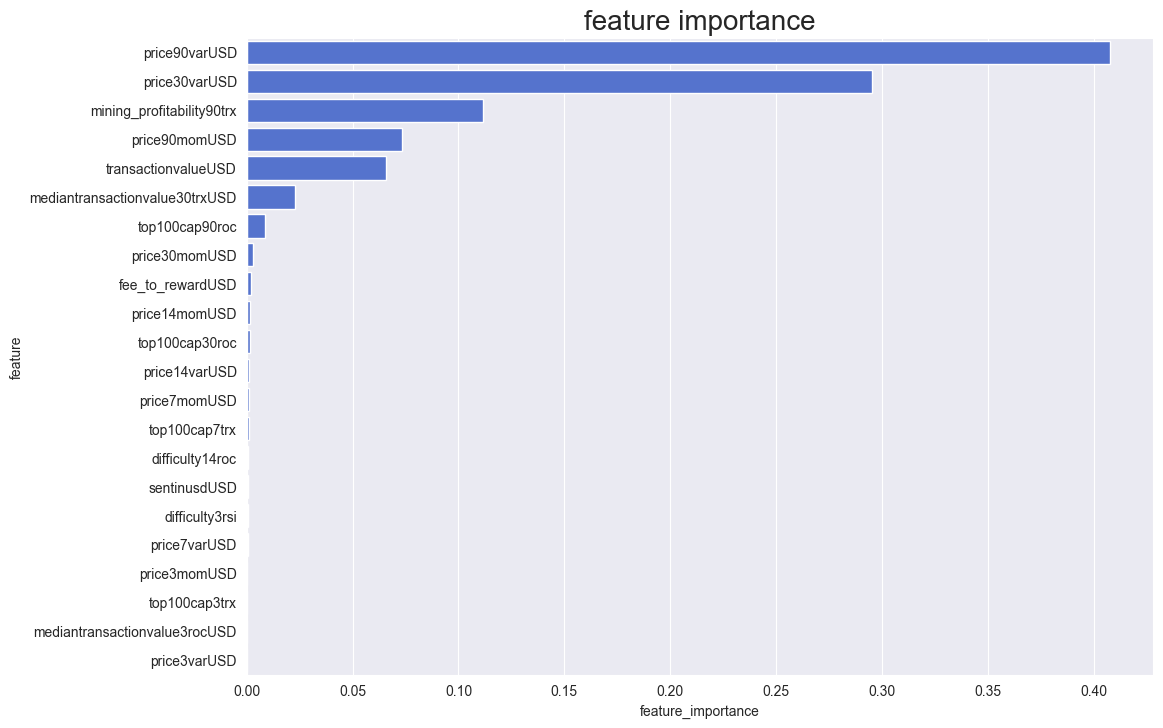

In [50]:
cmns.plot_feature_importance(imp_feat,'feature importance')

In [51]:
imp_feat[imp_feat['feature_importance']>0]


,feature,feature_importance
0,price90varUSD,0.407735
1,price30varUSD,0.295183
2,mining_profitability90trx,0.111660
3,price90momUSD,0.073143
4,transactionvalueUSD,0.065712
5,mediantransactionvalue30trxUSD,0.022952
6,top100cap90roc,0.008431
7,price30momUSD,0.002934
8,fee_to_rewardUSD,0.002094
9,price14momUSD,0.001603


In [52]:
cols=[0,1,2,4,3,7,5,16,18,16,19,24,21,22,26]

In [53]:
#selected=imp_feat[imp_feat['feature_importance']>0.001]
selected=imp_feat.filter(cols,axis=0)

In [54]:
selected

,feature,feature_importance
0,price90varUSD,0.407735
1,price30varUSD,0.295183
2,mining_profitability90trx,0.111660
4,transactionvalueUSD,0.065712
3,price90momUSD,0.073143
7,price30momUSD,0.002934
5,mediantransactionvalue30trxUSD,0.022952
16,difficulty3rsi,0.000676
18,price3momUSD,0.000332
19,top100cap3trx,0.000326


In [55]:
selected.feature_importance.sum()

0.9808586452643473

In [72]:
X_high=X[selected.feature]

In [73]:
X_high.shape

(1097, 11)

In [74]:
X_high.sort_index(axis=1,inplace=True)

C:\Users\13275\AppData\Local\Temp\ipykernel_26456\554794614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_high.sort_index(axis=1,inplace=True)


In [75]:
X_high

,difficulty3rsi,mediantransactionvalue30trxUSD,mining_profitability90trx,price30momUSD,price30varUSD,price3momUSD,price3varUSD,price90momUSD,price90varUSD,top100cap3trx,transactionvalueUSD
0,99.997,-0.240,-0.307,-77.554,28623,-231.566,3878.000,-1017.000,573722,0.003,12757
1,100.000,-0.261,-0.308,-191.732,29355,-261.045,4729.000,-1046.000,581575,-0.020,16735
2,100.000,-0.279,-0.310,-64.189,29328,-42.402,3051.000,-878.841,587195,-0.020,23302
3,100.000,-0.300,-0.311,38.817,29574,152.469,11526.000,-626.347,590895,-0.010,16928
4,100.000,-0.325,-0.312,67.278,30437,376.272,10731.000,-565.003,593111,0.003,14695
...,...,...,...,...,...,...,...,...,...,...,...
1092,99.043,-0.085,-0.406,425.550,82135,-179.890,8243.000,-2758.000,2474152,0.031,53190
1093,99.043,-0.087,-0.405,177.977,76543,-258.919,8530.000,-2936.000,2479394,0.047,54195
1094,99.043,-0.090,-0.404,-347.725,82274,-257.127,1350.000,-2778.000,2489811,0.027,50405
1095,99.043,-0.094,-0.403,-489.020,86919,-69.693,287.999,-2661.000,2500289,0.030,42790


In [76]:
X_high['price3wmaUSD']=np.ravel(y)


C:\Users\13275\AppData\Local\Temp\ipykernel_26456\2676381695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_high['price3wmaUSD']=np.ravel(y)


In [77]:
X_high

,difficulty3rsi,mediantransactionvalue30trxUSD,mining_profitability90trx,price30momUSD,price30varUSD,price3momUSD,price3varUSD,price90momUSD,price90varUSD,top100cap3trx,transactionvalueUSD,price3wmaUSD
0,99.997,-0.240,-0.307,-77.554,28623,-231.566,3878.000,-1017.000,573722,0.003,12757,7192
1,100.000,-0.261,-0.308,-191.732,29355,-261.045,4729.000,-1046.000,581575,-0.020,16735,7207
2,100.000,-0.279,-0.310,-64.189,29328,-42.402,3051.000,-878.841,587195,-0.020,23302,7300
3,100.000,-0.300,-0.311,38.817,29574,152.469,11526.000,-626.347,590895,-0.010,16928,7423
4,100.000,-0.325,-0.312,67.278,30437,376.272,10731.000,-565.003,593111,0.003,14695,7527
...,...,...,...,...,...,...,...,...,...,...,...,...
1092,99.043,-0.085,-0.406,425.550,82135,-179.890,8243.000,-2758.000,2474152,0.031,53190,16643
1093,99.043,-0.087,-0.405,177.977,76543,-258.919,8530.000,-2936.000,2479394,0.047,54195,16579
1094,99.043,-0.090,-0.404,-347.725,82274,-257.127,1350.000,-2778.000,2489811,0.027,50405,16567
1095,99.043,-0.094,-0.403,-489.020,86919,-69.693,287.999,-2661.000,2500289,0.030,42790,16561


<Axes: >

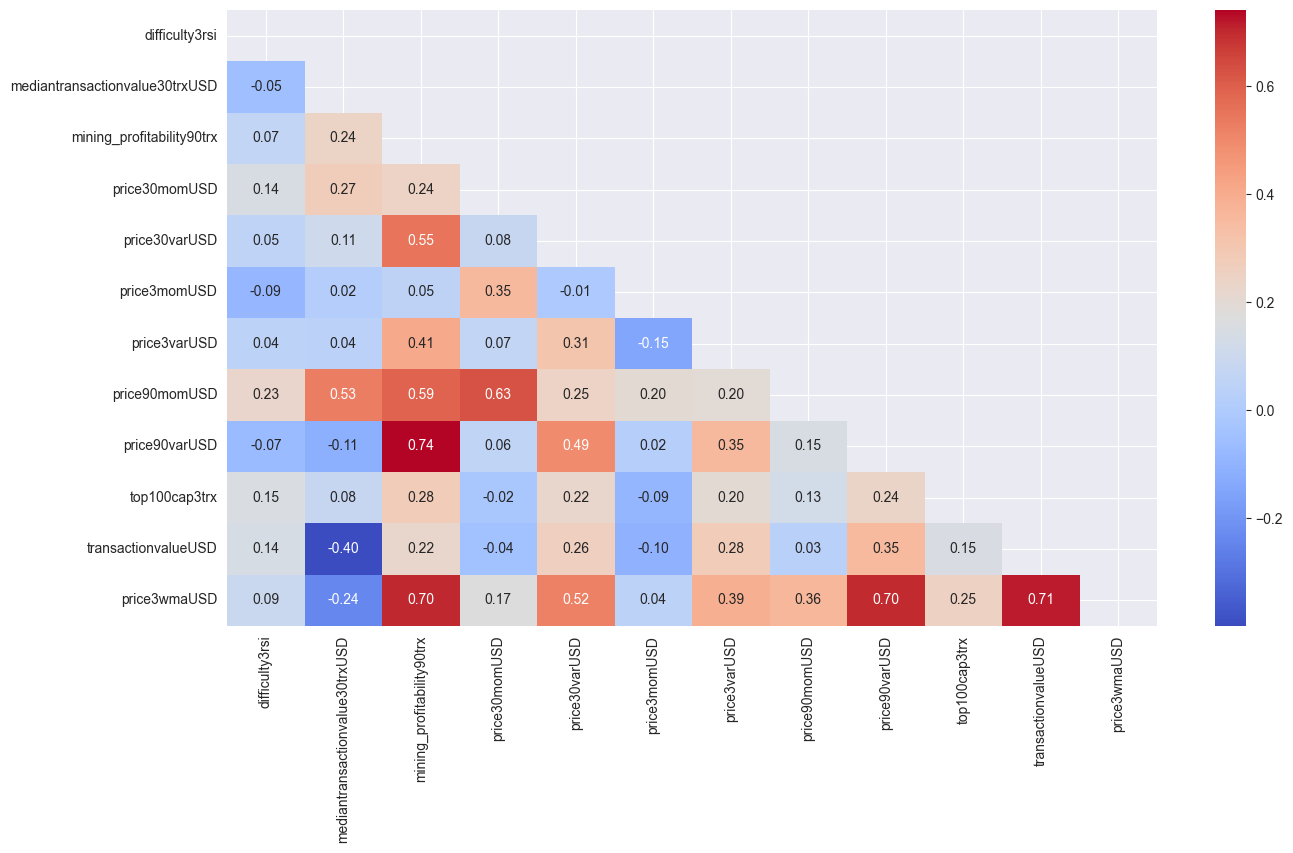

In [78]:
corr = X_high.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(corr,mask=mask, cmap='coolwarm',annot=True, fmt='.2f')

In [79]:
X_high=X_high[X_high['price3wmaUSD']!=1]

In [80]:
X_high = X_high.astype(np.float32)

In [81]:
X_high

,difficulty3rsi,mediantransactionvalue30trxUSD,mining_profitability90trx,price30momUSD,price30varUSD,price3momUSD,price3varUSD,price90momUSD,price90varUSD,top100cap3trx,transactionvalueUSD,price3wmaUSD
0,99.997002,-0.240,-0.307,-77.554001,28623.0,-231.565994,3878.000000,-1017.000000,573722.0,0.003,12757.0,7192.0
1,100.000000,-0.261,-0.308,-191.731995,29355.0,-261.045013,4729.000000,-1046.000000,581575.0,-0.020,16735.0,7207.0
2,100.000000,-0.279,-0.310,-64.189003,29328.0,-42.402000,3051.000000,-878.841003,587195.0,-0.020,23302.0,7300.0
3,100.000000,-0.300,-0.311,38.817001,29574.0,152.468994,11526.000000,-626.346985,590895.0,-0.010,16928.0,7423.0
4,100.000000,-0.325,-0.312,67.278000,30437.0,376.272003,10731.000000,-565.002991,593111.0,0.003,14695.0,7527.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1092,99.042999,-0.085,-0.406,425.549988,82135.0,-179.889999,8243.000000,-2758.000000,2474152.0,0.031,53190.0,16643.0
1093,99.042999,-0.087,-0.405,177.977005,76543.0,-258.919006,8530.000000,-2936.000000,2479394.0,0.047,54195.0,16579.0
1094,99.042999,-0.090,-0.404,-347.725006,82274.0,-257.127014,1350.000000,-2778.000000,2489811.0,0.027,50405.0,16567.0
1095,99.042999,-0.094,-0.403,-489.019989,86919.0,-69.693001,287.998993,-2661.000000,2500289.0,0.030,42790.0,16561.0


In [82]:
X_high.to_csv('data/reg_interval20-23wmand.csv',sep=',',index=False)

In [68]:
from sklearn.ensemble import IsolationForest
outlier=IsolationForest(contamination=0.9)
price=X_high['price3wmaUSD']
price=price.values
price=np.reshape(price,(-1,1))
outlier = IsolationForest(contamination='auto')
outlier.fit(price)
outs=outlier.predict(price)
X_high['outlier']=pd.DataFrame(zip(outs))
X_high=X_high.query('outlier != -1')
X_high.reset_index(drop=True,inplace=True)
X_high.drop(columns=['outlier'],inplace=True)

C:\Users\13275\AppData\Local\Temp\ipykernel_26456\1070131642.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_high.drop(columns=['outlier'],inplace=True)


In [69]:
X_high.to_csv('data/reg_interval20-23wma.csv',sep=',',index=False)

In [70]:
X_high.columns

Index(['difficulty3rsi', 'mediantransactionvalue30trxUSD',
       'mining_profitability90trx', 'price30momUSD', 'price30varUSD',
       'price3momUSD', 'price3varUSD', 'price90momUSD', 'price90varUSD',
       'top100cap3trx', 'transactionvalueUSD', 'price3wmaUSD'],
      dtype='object')

In [71]:
X_high.shape

(639, 12)

In [ ]:
'''df1=pd.read_csv('reg_interval1.csv',sep=',')
date_range = pd.date_range(start='2018-01-01', end='2021-01-01', freq='D')
'''


In [ ]:
'''# Check if the date range length matches the number of rows in the DataFrame
if len(date_range) == len(df1):
    df1['Date'] = date_range
else:
    print("The date range does not match the number of rows in the DataFrame.")
df1.to_csv('reg_interval2.csv',sep=',',index=False)
# Show the updated DataFrame
print(df1.head())'''